In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from NeuralNetworkModel import *
from tqdm import tqdm


In [248]:
df = pd.read_csv('train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [249]:
x_train = df.drop(columns='label')
y_train = df['label']
print('x train :\n', x_train)
# print('\ny train :\n', y_train)

x train :
        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  .

#### Convert image from gray to black and white

In [250]:
def convert(img):
    for i in range(len(img)):
        for j in range(len(img[i])):
            if img[i][j] > 0:
                img[i][j] = 1
    return img

#### Image before convert

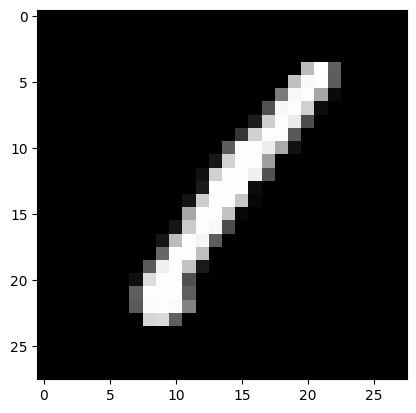

In [251]:
data = np.array(x_train.iloc[0, :]).reshape(28, 28)
plt.imshow(data, cmap='gray')

#### Image after convert

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 

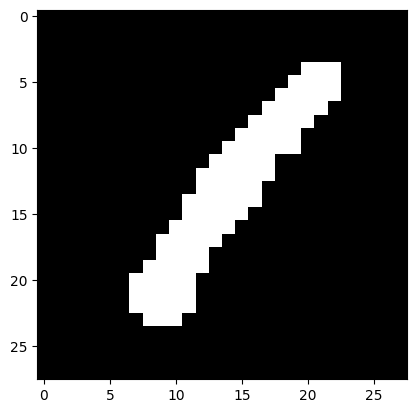

In [252]:
data = convert(data)
plt.imshow(data, cmap='gray')
print(data)

#### Convert X train

**X train after convert**

In [253]:
print("unique value of first x_train :\n", x_train.iloc[0, :].unique())
print()
print("x_train value :\n", x_train.iloc[0, :].values)


unique value of first x_train :
 [  0 188 255  94 191 250 253  93 123 248 167  10  80 247 208  13  29 207
 235  77  54 209  88 254 238 170  17  23 210 159  16 240  81  27  20 206
 198   7 168 196 203  76  22 245 103  89 195  25  15 220 251 131 214 218
  95]

x_train value :
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253
  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

**X_train before convert**

In [254]:
def convert_data(x_train):
    for i in range(len(x_train)):
        xi = x_train.iloc[i, :]
        img = np.array(xi).reshape(28, 28)
        con = convert(img)
        x_train.iloc[i, :] = np.array(con).reshape(784, )
        
convert_data(x_train)

take a random sample in x_train and visualize

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 

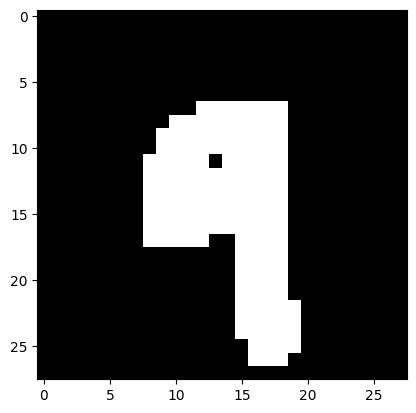

In [255]:
rand = np.random.randint(0, 42000)
x_rand = x_train.iloc[rand, :]
x_rand = np.array(x_rand).reshape(28, 28)
print(x_rand)
plt.imshow(x_rand, cmap='gray')


#### One hot coding

In [256]:
def one_hot_coding(y_train):
    m = len(y_train.unique())
    y_new = []
    for i in y_train.values:
        y_n = [0] * m
        y_n[i] = 1
        y_new.append(y_n)
    y_new = pd.DataFrame(y_new)
    return y_new

#### Label before one hot

In [257]:
print("label :", y_train[0])
print('shape :', y_train[0].shape)

label : 1
shape : ()


#### Label after one hot

In [258]:
y_train_one_hot = one_hot_coding(y_train)
y_train_one_hot.index = y_train
print(y_train_one_hot)

       0  1  2  3  4  5  6  7  8  9
label                              
1      0  1  0  0  0  0  0  0  0  0
0      1  0  0  0  0  0  0  0  0  0
1      0  1  0  0  0  0  0  0  0  0
4      0  0  0  0  1  0  0  0  0  0
0      1  0  0  0  0  0  0  0  0  0
...   .. .. .. .. .. .. .. .. .. ..
0      1  0  0  0  0  0  0  0  0  0
1      0  1  0  0  0  0  0  0  0  0
7      0  0  0  0  0  0  0  1  0  0
6      0  0  0  0  0  0  1  0  0  0
9      0  0  0  0  0  0  0  0  0  1

[42000 rows x 10 columns]


#### Model

In [259]:
model = DeepNeuralNetwork(
    Layer(28*28),
    Layer(64, activation_func='relu'),
    Layer(64, activation_func='relu'),
    Layer(10, activation_func='softmax', train_bias=False)
)

**check forward pass**

In [260]:
single_x_train = x_train.iloc[0, :].to_numpy().reshape(784, 1)
single_y_train = y_train_one_hot.iloc[0, :]
print('x train shape :\n', single_x_train.shape)
print('y train shape :\n', single_y_train.shape)

x train shape :
 (784, 1)
y train shape :
 (10,)


In [261]:
output = model.forward(single_x_train)
print('activation cache :\n', output[0][-1])
print('linear cache :\n', output[1][-1])
print('output\n', output[0][-1])

activation cache :
 [[5.73551997e-06]
 [4.10402130e-05]
 [6.84298190e-06]
 [2.02806160e-04]
 [1.71875424e-05]
 [1.57636058e-05]
 [3.62246522e-05]
 [8.24558051e-05]
 [1.87222655e-05]
 [9.99573221e-01]]
linear cache :
 [[45.3462539 ]
 [47.31412788]
 [45.52279907]
 [48.91182613]
 [46.44376033]
 [46.35727934]
 [47.18931537]
 [48.01183794]
 [46.52928897]
 [57.41465917]]
output
 [[5.73551997e-06]
 [4.10402130e-05]
 [6.84298190e-06]
 [2.02806160e-04]
 [1.71875424e-05]
 [1.57636058e-05]
 [3.62246522e-05]
 [8.24558051e-05]
 [1.87222655e-05]
 [9.99573221e-01]]


**training**

In [262]:
def fit(x_train, y_train_one_hot, y_train, lr = 0.01, batch_size = 32, epochs = 1000):
    N, d = x_train.shape
    accuracy_point = []
    for it in tqdm(range(epochs), desc='Epochs', ascii=True):
        rand_id = np.random.choice(N, size=batch_size, replace=False)
        for i in rand_id:
            xi = np.array([x_train.iloc[i, :]]).T
            yi = np.array([y_train_one_hot.iloc[i, :]]).T
            activation_cache, linear_cache = model.forward(xi)
            model.backpropagation(linear_cache, activation_cache, yi)
            model.update(lr = lr)
        if it % 100 == 0:
            y_pred = model.predict(x_train)
            acc = model.accuracy(y_train, y_pred)
            accuracy_point.append(acc)
    return accuracy_point

In [263]:
accuracy_point = fit(x_train, y_train_one_hot, y_train, lr=0.001, batch_size=64, epochs=10000)

Epochs: 100%|##########| 10000/10000 [14:00<00:00, 11.90it/s] 


In [264]:
y_pred = model.predict(x_train)
y_pred

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 6, 8, 6,
       2, 0, 2, 3, 6, 9, 9, 7, 8, 9, 4, 9, 2, 1, 3, 1, 1, 4, 9, 1, 4, 9,
       2, 6, 3, 7, 7, 4, 7, 5, 1, 9, 0, 2, 2, 3, 9, 1, 1, 1, 5, 0, 6, 3,
       4, 8, 1, 0, 3, 9, 6, 2, 6, 4, 9, 1, 4, 1, 5, 4, 8, 9, 2, 9, 9, 8,
       9, 6, 3, 6, 4, 6, 2, 9, 1, 2, 0, 5, 9, 2, 7, 7, 2, 8, 8, 5, 0, 6,
       0, 0, 2, 9, 0, 4, 7, 7, 1, 5, 7, 9, 4, 6, 1, 3, 7, 6, 5, 0, 4, 8,
       7, 6, 1, 8, 7, 3, 7, 3, 1, 0, 3, 4, 5, 4, 0, 5, 4, 0, 3, 5, 1, 0,
       8, 3, 7, 0, 9, 6, 6, 9, 5, 4, 6, 9, 3, 5, 4, 2, 4, 8, 7, 7, 5, 8,
       8, 8, 3, 6, 9, 3, 1, 0, 4, 1, 5, 9, 0, 6, 2, 1, 3, 0, 6, 0, 0, 8,
       3, 2, 0, 0, 6, 0, 0, 4, 7, 2, 7, 1, 9, 9, 3, 9, 8, 4, 6, 6, 5, 3,
       8, 1, 8, 7, 1, 3, 7, 6, 3, 6, 3, 6, 3, 2, 3, 2, 2, 7, 9, 2, 3, 2,
       7, 5, 5, 8, 8, 2, 0, 1, 4, 0, 6, 3, 7, 1, 1, 1, 4, 7, 0, 2, 9, 2,
       0, 5, 6, 0, 8, 9, 6, 2, 0, 0, 7, 2, 0, 4, 2, 0, 9, 1, 6, 9, 3, 0,
       0, 2, 0, 6, 8, 4, 0, 7, 2, 1, 9, 5, 2, 4, 8,

**Model weights and biases**

In [265]:
np.set_printoptions(threshold=np.inf)

In [266]:
for i in range(model.layers_len-1):
    print(f"weight {i}:\n", model.weights[i])
    print(f"bias {i}:\n", model.layers[i].biases)

weight 0:
 [[ 2.46428366e-02  2.69235327e-02  1.58924515e-02  2.13935417e-03
   4.40862859e-02  1.51323345e-02  2.03276884e-02  4.11449099e-02
   1.73048708e-04  1.63610947e-02  8.67907321e-03  2.28181029e-02
   4.12349224e-02  1.61468795e-02  4.03701240e-02  4.32311101e-03
   4.31027856e-02  3.35702694e-02  3.45244428e-02  3.31612326e-03
   4.80309629e-03  1.70323133e-02  4.33473995e-02  1.97230298e-02
   3.03825591e-03  8.86701117e-03  2.65532856e-03  2.82347404e-02
   1.96013992e-03  1.19052314e-02  1.97521928e-03  2.69068708e-02
   4.43416491e-02  4.16088289e-02  3.09120671e-02  1.19165770e-02
   1.98938774e-02  2.87038875e-02  2.19450334e-02  2.49913689e-02
   4.20106142e-02  4.15528222e-02  4.11380162e-02  3.56737978e-02
   5.08327500e-03  4.39209695e-02  1.72582727e-02  1.23115197e-02
   2.36744235e-02  2.30359824e-02  1.06796224e-02  2.10208216e-03
   8.62298402e-04  2.68822064e-02  4.29005730e-02  3.47172529e-02
   2.86188710e-02  3.79986548e-02  4.04597982e-02  4.34904588e-02

In [267]:
bias = []
for i in range(model.layers_len-1):
    bias.append(model.layers[i].biases)

print(bias)

[array([[-0.01539134],
       [-0.08354988],
       [-0.07985822],
       [ 0.06096058],
       [-0.0049025 ],
       [ 0.00534358],
       [-0.0265516 ],
       [-0.02934859],
       [-0.07438581],
       [-0.14870561],
       [ 0.02046459],
       [-0.27591123],
       [ 0.09200643],
       [ 0.01265575],
       [-0.07939389],
       [-0.06373379],
       [-0.17983163],
       [ 0.01171238],
       [-0.16590697],
       [ 0.02013292],
       [ 0.07127311],
       [-0.06190618],
       [-0.14113685],
       [-0.1544569 ],
       [-0.05191541],
       [-0.09921687],
       [-0.00263791],
       [-0.23064551],
       [-0.08262663],
       [-0.00560793],
       [-0.08100185],
       [-0.21323898],
       [ 0.04402929],
       [-0.04363709],
       [ 0.03513972],
       [-0.10125698],
       [-0.09341363],
       [ 0.0556676 ],
       [-0.06092262],
       [ 0.04594277],
       [ 0.07951858],
       [-0.16633657],
       [-0.14758406],
       [-0.05619219],
       [-0.00513035],
       [-

In [268]:
def save_weights_bias():
    np.save('weights.npy', np.array(model.weights, dtype=object), allow_pickle=True)
    np.save('bias.npy', np.array(bias, dtype=object), allow_pickle=True)

In [269]:
save_weights_bias()

In [270]:
def get_weights_bias():
    weight = np.load('weights.npy', allow_pickle=True)
    bias = np.load('bias.npy', allow_pickle=True)
    return weight, bias

In [271]:
w, b = get_weights_bias()

**accuracy**

In [272]:
acc = model.accuracy(y_train, y_pred)
print("accuracy :", acc)

accuracy : 0.986547619047619


#### Accuracy graph

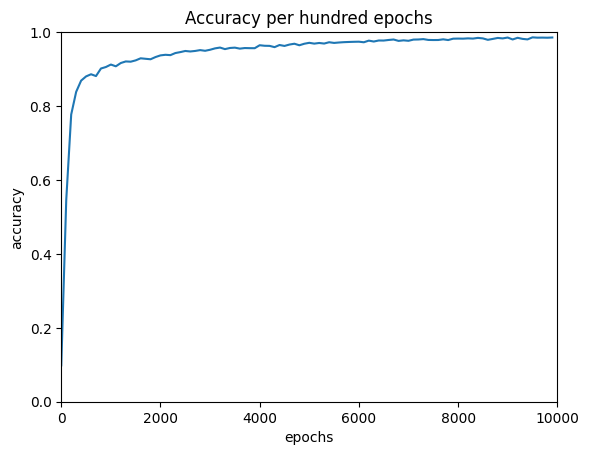

In [273]:
epoch = np.arange(0, 10000, 100)
plt.plot(epoch, accuracy_point)
plt.title('Accuracy per hundred epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.axis([0, 10000, 0.0, 1.00])
plt.show()

## Test Dataset

#### Read data

In [274]:
x_test = pd.read_csv('test.csv')
x_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Convert Data

In [275]:
convert_data(x_test)

take a random data in x test and visualize

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 

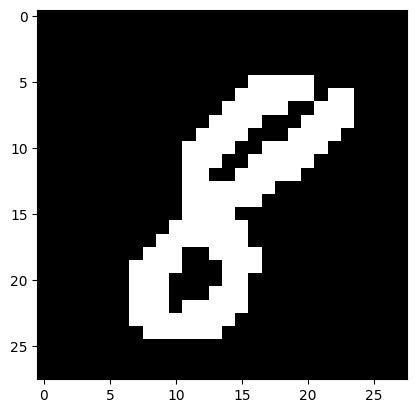

In [276]:
rand = np.random.randint(0, 28000)
x_rand = x_test.iloc[rand, :]
x_rand = np.array(x_rand).reshape(28, 28)
print(x_rand)
plt.imshow(x_rand, cmap='gray')

### Predict test set

In [277]:
def predict_test_set():
    rand = np.random.randint(0, 28000)
    x_rand = x_test.iloc[rand, :]
    x_rand = np.array(x_rand).reshape(28, 28)
    # print(x_rand)
    plt.imshow(x_rand, cmap='gray')
    plt.show()
    y_pred = model.predict_single_point(x_rand.reshape(784, 1))
    print("y_predict :", y_pred)

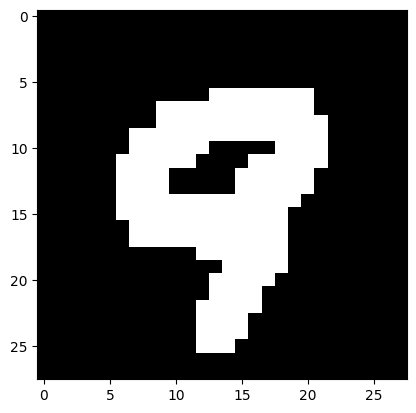

y_predict : 9


In [278]:
predict_test_set()